In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import urllib
try:
    df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases'
                     '/breast-cancer-wisconsin/wdbc.data', header=None)
except urllib.error.URLError:
    df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book/master/code/'
                     'datasets/wdbc/wdbc.data', header=None)
print('rows, columns:', df.shape)
df.head()

rows, columns: (569, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
X=df.iloc[:,2:]
y=df.iloc[:,1]
le=LabelEncoder()
y=le.fit_transform(y)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
pipe=Pipeline([('sc',StandardScaler()),('pca',PCA()),('lr',LogisticRegression())])
pipe.fit(X_train,y_train)
pipe.score(X_test,y_test)

C:\Users\nsats\Anaconda3\envs\gpu-env\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9649122807017544

In [4]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import StratifiedKFold
kFold=StratifiedKFold(n_splits=10,shuffle=False,random_state=1)

scores=[]
for train_index,test_index in kFold.split(X_train,y_train):
    X_tr,X_val=X_train.iloc[train_index],X_train.iloc[test_index]
    y_tr,y_val=y_train[train_index],y_train[test_index]
    pipe.fit(X_tr,y_tr)
    score=pipe.score(X_val,y_val)
    scores.append(score)
    print('clss dist:%s, Acc:%s' %(np.bincount(y_val),score))
    
print('CV accuracy:%.3f +/-%.3f'% (np.mean(scores),np.std(scores)))

clss dist:[29 17], Acc:0.9782608695652174
clss dist:[29 17], Acc:0.9782608695652174
clss dist:[29 17], Acc:0.9782608695652174
clss dist:[29 17], Acc:0.9782608695652174
clss dist:[29 17], Acc:0.9565217391304348
clss dist:[29 16], Acc:0.9333333333333333
clss dist:[29 16], Acc:1.0
clss dist:[29 16], Acc:1.0
clss dist:[29 16], Acc:0.9777777777777777
clss dist:[29 16], Acc:1.0
CV accuracy:0.978 +/-0.020


In [5]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=pipe,X=X_train,y=y_train,cv=10,n_jobs=-1)
print('CV accuracy scores: %s' % scores)
print('CV accuracy :%.3f +/- %.3f' % (np.mean(scores),np.std(scores)))

CV accuracy scores: [0.97826087 0.97826087 0.97826087 0.97826087 0.95652174 0.93333333
 1.         1.         0.97777778 1.        ]
CV accuracy :0.978 +/- 0.020


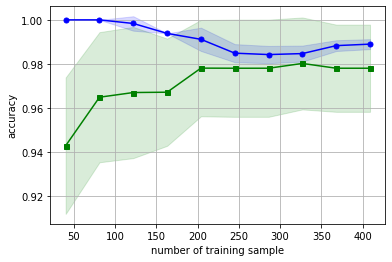

In [29]:
from sklearn.model_selection import learning_curve
pipe_lr=Pipeline([('sc',StandardScaler()),('lr',LogisticRegression(penalty='l2',random_state=0))])
train_size,train_scores,test_scores=learning_curve(estimator=pipe_lr,
                                                   X=X_train,
                                                   y=y_train,
                                                   train_sizes=np.linspace(0.1,1.0,10),
                                                   cv=10,
                                                   n_jobs=-1)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(train_size,train_mean,color='blue',marker='o',markersize=5,label='train accuracy')
plt.fill_between(train_size,train_mean+train_std,train_mean-train_std,color='blue',alpha=0.15)
plt.plot(train_size,test_mean,color='green',marker='s',markersize=5,label='test accuracy')
plt.fill_between(train_size,test_mean+test_std,test_mean-test_std,color='green',alpha=0.15)
plt.grid()
plt.xlabel('number of training sample')
plt.ylabel('accuracy')
plt.show()

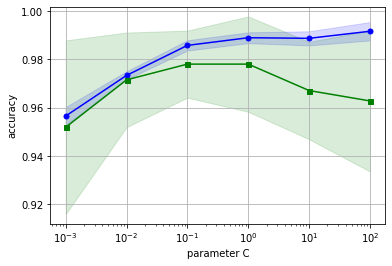

In [56]:

from sklearn.model_selection import validation_curve
param_range=[10**i for i in range(-3,3)]
pipe_lr=Pipeline([('sc',StandardScaler()),('lr',LogisticRegression(penalty='l2',random_state=0))])
train_scores,test_scores=validation_curve(estimator=pipe_lr,
                                                   X=X_train,
                                                   y=y_train,
                                                   param_name="lr__C",
                                                   param_range=param_range,
                                                   cv=10)
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)
test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)
plt.plot(param_range,train_mean,color='blue',marker='o',markersize=5,label='train accuracy')
plt.fill_between(param_range,train_mean+train_std,train_mean-train_std,color='blue',alpha=0.15)
plt.plot(param_range,test_mean,color='green',marker='s',markersize=5,label='test accuracy')
plt.fill_between(param_range,test_mean+test_std,test_mean-test_std,color='green',alpha=0.15)
plt.grid()

plt.xlabel('parameter C')
plt.xscale('log')
plt.ylabel('accuracy')
plt.show()

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
pipe_svm=Pipeline([('sc',StandardScaler()),('svm',SVC(random_state=0))])
param_range=[10**i for i in range(-4,4)]
param_grid=[{'svm__C':param_range,'svm__kernel':['linear']},
            {'svm__C':param_range,'svm__gamma':param_range,'svm__kernel':['rbf']}]
gs=GridSearchCV(estimator=pipe_svm,param_grid=param_grid,scoring='accuracy',cv=10,n_jobs=-1)
gs=gs.fit(X_train,y_train)
print(gs.best_score_)
print(gs.best_params_)
for params,mean_score,scores in gs.grid_scores

0.9802197802197802
{'svm__C': 10, 'svm__gamma': 0.01, 'svm__kernel': 'rbf'}


In [72]:
pd.DataFrame(gs.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__kernel,param_svm__gamma,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016256,0.000457,0.002501,0.000495,0.0001,linear,NaN,"{'svm__C': 0.0001, 'svm__kernel': 'linear'}",0.630435,0.630435,...,0.630435,0.652174,0.644444,0.666667,0.666667,0.666667,0.644444,0.648352,0.014243,27
1,0.010372,0.004043,0.002095,0.000698,0.001,linear,NaN,"{'svm__C': 0.001, 'svm__kernel': 'linear'}",0.934783,0.891304,...,0.956522,0.913043,0.911111,0.955556,0.933333,0.933333,0.933333,0.931868,0.020608,24
2,0.005285,0.000898,0.001098,0.000301,0.01,linear,NaN,"{'svm__C': 0.01, 'svm__kernel': 'linear'}",0.978261,0.956522,...,0.978261,0.956522,0.933333,0.977778,0.955556,0.955556,1.000000,0.964835,0.017648,12
3,0.004588,0.000489,0.001196,0.000399,0.1,linear,NaN,"{'svm__C': 0.1, 'svm__kernel': 'linear'}",0.978261,0.956522,...,0.956522,0.956522,0.955556,1.000000,1.000000,0.977778,1.000000,0.975824,0.018128,3
4,0.004091,0.000537,0.000800,0.000400,1,linear,NaN,"{'svm__C': 1, 'svm__kernel': 'linear'}",0.956522,0.978261,...,0.956522,0.956522,0.933333,1.000000,1.000000,0.977778,0.977778,0.971429,0.019744,5
5,0.006582,0.001795,0.001096,0.000300,10,linear,NaN,"{'svm__C': 10, 'svm__kernel': 'linear'}",0.891304,0.956522,...,0.956522,0.956522,0.955556,1.000000,1.000000,1.000000,1.000000,0.969231,0.032622,9
6,0.017254,0.008297,0.001197,0.000398,100,linear,NaN,"{'svm__C': 100, 'svm__kernel': 'linear'}",0.913043,0.956522,...,0.978261,0.956522,0.955556,0.955556,1.000000,1.000000,0.977778,0.964835,0.024260,12
7,0.035605,0.017090,0.001297,0.000457,1000,linear,NaN,"{'svm__C': 1000, 'svm__kernel': 'linear'}",0.913043,0.978261,...,0.978261,0.956522,0.955556,0.955556,0.977778,0.977778,0.955556,0.958242,0.020522,14
8,0.010571,0.000488,0.001996,0.000444,0.0001,rbf,0.0001,"{'svm__C': 0.0001, 'svm__gamma': 0.0001, 'svm_...",0.630435,0.630435,...,0.630435,0.630435,0.644444,0.644444,0.644444,0.644444,0.644444,0.637363,0.007004,32
9,0.010970,0.000773,0.002094,0.000300,0.0001,rbf,0.001,"{'svm__C': 0.0001, 'svm__gamma': 0.001, 'svm__...",0.630435,0.630435,...,0.630435,0.630435,0.644444,0.644444,0.644444,0.644444,0.644444,0.637363,0.007004,32


In [74]:
clf=gs.best_estimator_
clf.fit(X_train,y_train)
print('test accuracy:%.2f'% clf.score(X_test,y_test))

test accuracy:0.98
